In [59]:
%matplotlib inline
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

In [90]:
IMG_DIR = '../raw_data/dataset1'
DOCS_DIR = '../docs/exp2/'
OUTPUT_DIR = '../datasets/dataset1'

In [93]:
def read_raw_data_metadata(fn):
    data = None
    with open(fn, "r") as f:
        data = json.load(f)
    return data

raw_data_meta = read_raw_data_metadata("../raw_data/dataset1/metadata")

In [94]:
def get_frame_id(fname):
    return fname.split("--")[1].split('.')[0]

def get_track_id(fname):
    return fname.split("--")[0].split('bee')[1]

def get_name(fname):
    return fname.split('/')[-1]

In [95]:
images = io.imread_collection(os.path.join(IMG_DIR, "bee*"))

## Count Bees By Frames

In [96]:
bees_count_by_frame = dict()
for fname in images.files:
    frame = get_frame_id(fname)
    if frame in bees_count_by_frame:
        bees_count_by_frame[frame] += 1
    else:
        bees_count_by_frame[frame] = 1

In [97]:
frames_bee_count = list()
for key, val in bees_count_by_frame.items():
#     print(key, val)
    frames_bee_count.append(val)
frames_bee_count = np.array(frames_bee_count)

In [98]:
# sorted(bees_count_by_frame.keys())

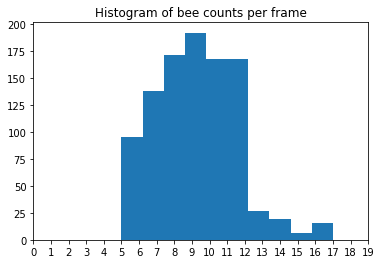

In [99]:
plt.hist(frames_bee_count, bins=10)
plt.xticks(np.arange(20));
plt.title("Histogram of bee counts per frame");
plt.savefig(os.path.join(DOCS_DIR, "histogram_of_bee_counts_per_frame.png"))

## Count Bees by Tracks

In [100]:
bees_count_by_track = dict()
for fname in images.files:
    track = get_track_id(fname)
    if track in bees_count_by_track:
        bees_count_by_track[track] += 1
    else:
        bees_count_by_track[track] = 1

In [101]:
tracks_bee_count = list()
for key, val in bees_count_by_track.items():
#     print(key, val)
    tracks_bee_count.append(val)
tracks_bee_count = np.array(tracks_bee_count)

In [102]:
# sorted(bees_count_by_track.keys())

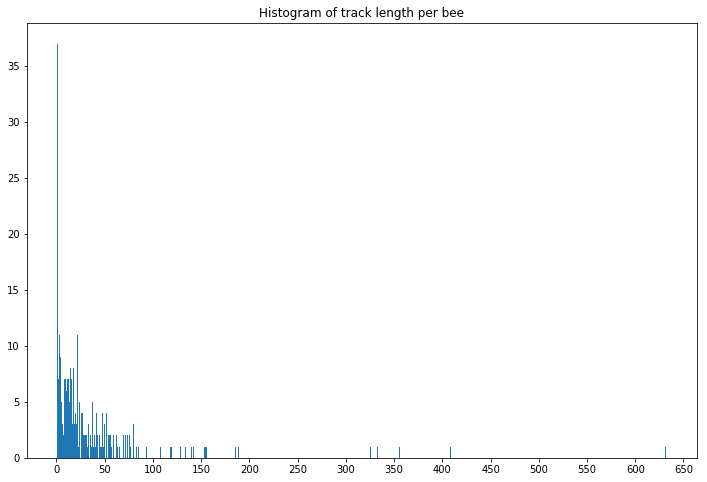

In [103]:
plt.figure(figsize=(12, 8))
plt.hist(tracks_bee_count, bins=600);
plt.xticks(np.arange(0, 700, 50));
plt.title("Histogram of track length per bee");
plt.savefig(os.path.join(DOCS_DIR, "histogram_of_track_length_per_bee.png"))

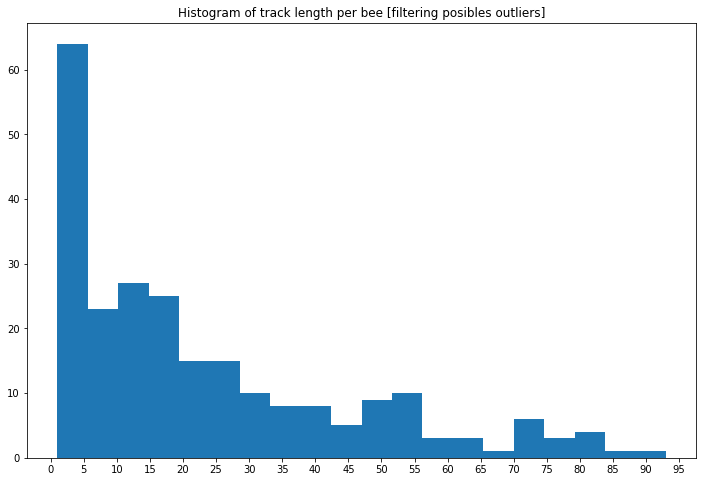

In [104]:
plt.figure(figsize=(12, 8))
plt.hist(tracks_bee_count[tracks_bee_count < 100], bins=20);
plt.xticks(np.arange(0, 100, 5));
plt.title("Histogram of track length per bee [filtering posibles outliers]");
plt.savefig(os.path.join(DOCS_DIR, "histogram_of_track_length_per_bee_filtered.png"))

In [105]:
images_size = len(images.files)
images_size

9169

In [106]:
train_size = int(images_size * .8)
train_size

7335

In [107]:
test_size = int(images_size * .2)
test_size

1833

In [108]:
test_size + train_size

9168

## Store Train data by frame

In [109]:
train_data_path = os.path.join(OUTPUT_DIR, 'train_data')
train_frame_data_path = os.path.join(OUTPUT_DIR, 'train_data', 'frame')
train_track_data_path = os.path.join(OUTPUT_DIR, 'train_data', 'track')

test_data_path = os.path.join(OUTPUT_DIR, 'test_data')
test_frame_data_path = os.path.join(OUTPUT_DIR, 'test_data', 'frame')
test_track_data_path = os.path.join(OUTPUT_DIR, 'test_data', 'track')

if not os.path.isdir(OUTPUT_DIR):
    os.mkdir(OUTPUT_DIR)


if not os.path.isdir(train_data_path):
    os.mkdir(train_data_path)
if not os.path.isdir(train_frame_data_path):
    os.mkdir(train_frame_data_path)
if not os.path.isdir(train_track_data_path):
    os.mkdir(train_track_data_path)

if not os.path.isdir(test_data_path):
    os.mkdir(test_data_path)
if not os.path.isdir(test_frame_data_path):
    os.mkdir(test_frame_data_path)
if not os.path.isdir(test_track_data_path):
    os.mkdir(test_track_data_path)


In [110]:
for img, fname in zip(images, images.files):
    frame = get_frame_id(fname)
    
    if int(frame) > 600:
        continue
    
    frame_path = os.path.join(train_frame_data_path , frame)
    filepath = os.path.join(frame_path, get_name(fname))
    if os.path.isdir(frame_path):
        io.imsave(filepath, img)
    else:
        os.mkdir(frame_path)
        io.imsave(filepath, img)
       

In [111]:
train_frame_info = "Train data frames was created by taking the first 600 frames"

## Store Train data by track

In [112]:
TRACK_COUNTS = 0
for img, fname in zip(images, images.files):
    frame = get_frame_id(fname)
    track = get_track_id(fname)
    
    if int(frame) > 600:
        continue
    
    track_path = os.path.join(train_track_data_path , track)
    filepath = os.path.join(track_path, get_name(fname))
    
    
    if os.path.isdir(track_path):
        if len(os.listdir(track_path)) > 25:
            continue
        io.imsave(filepath, img)
    else:
        os.mkdir(track_path)
        TRACK_COUNTS += 1
        print(track_path)
        io.imsave(filepath, img)
       

../datasets/dataset1/train_data/track/0000
../datasets/dataset1/train_data/track/0001
../datasets/dataset1/train_data/track/0002
../datasets/dataset1/train_data/track/0003
../datasets/dataset1/train_data/track/0004
../datasets/dataset1/train_data/track/0005
../datasets/dataset1/train_data/track/0006
../datasets/dataset1/train_data/track/0007
../datasets/dataset1/train_data/track/0008
../datasets/dataset1/train_data/track/0009
../datasets/dataset1/train_data/track/0010
../datasets/dataset1/train_data/track/0011
../datasets/dataset1/train_data/track/0012
../datasets/dataset1/train_data/track/0013
../datasets/dataset1/train_data/track/0014
../datasets/dataset1/train_data/track/0015
../datasets/dataset1/train_data/track/0016
../datasets/dataset1/train_data/track/0017
../datasets/dataset1/train_data/track/0018
../datasets/dataset1/train_data/track/0020
../datasets/dataset1/train_data/track/0021
../datasets/dataset1/train_data/track/0022
../datasets/dataset1/train_data/track/0024
../datasets

In [113]:
train_tracks_info = "Train data tracks was created by taking the tracks in the first 600 frames, but each track need to be more than 25 frames long."
train_tracks_count = TRACK_COUNTS

## Store Test data by frame

In [114]:
for img, fname in zip(images, images.files):
    frame = get_frame_id(fname)
    
    if int(frame) < 800:
        continue
    
    frame_path = os.path.join(test_frame_data_path , frame)
    filepath = os.path.join(frame_path, get_name(fname))
    if os.path.isdir(frame_path):
        io.imsave(filepath, img)
    else:
        os.mkdir(frame_path)
        io.imsave(filepath, img)
       

In [115]:
test_frame_info = "Test data frames was created by taking the frames after the first 800"

## Store Test data by track

In [116]:
TRACK_COUNTS_T = 0
for img, fname in zip(images, images.files):
    frame = get_frame_id(fname)
    track = get_track_id(fname)
    
    if int(frame) < 800:
        continue
    
    track_path = os.path.join(test_track_data_path , track)
    filepath = os.path.join(track_path, get_name(fname))
    
    
    if os.path.isdir(track_path):
        if len(os.listdir(track_path)) > 25:
            continue
        io.imsave(filepath, img)
    else:
        os.mkdir(track_path)
        TRACK_COUNTS_T += 1
        io.imsave(filepath, img)
       

In [117]:
test_tracks_info = "Test data tracks was created by taking the tracks after the first 800 frames, but each track need to be more than 25 frames long."
test_tracks_count = TRACK_COUNTS_T

In [118]:
dataset_meta = {
    "raw_data_meta" : raw_data_meta,
    "dataset_meta": { 
        "info" :  {
            "train_frames" : train_frame_info,
            "train_tracks" : train_tracks_info,
            "train_track_count" : train_tracks_count,
            "test_frames" : test_frame_info,
            "test_tracks" : test_tracks_info,
            "test_track_count" : test_tracks_count,
        }
    },
}

In [119]:
dataset_meta

{'dataset_meta': {'info': {'test_frames': 'Test data frames was created by taking the frames after the first 800',
   'test_track_count': 69,
   'test_tracks': 'Test data tracks was created by taking the tracks after the first 800 frames, but each track need to be more than 25 frames long.',
   'train_frames': 'Train data frames was created by taking the first 600 frames',
   'train_track_count': 160,
   'train_tracks': 'Train data tracks was created by taking the tracks in the first 600 frames, but each track need to be more than 25 frames long.'}},
 'raw_data_meta': {'folder': 'raw_data/dataset1/',
  'format': 'bee{id}--{frame}.jpg',
  'frames_amount': 1000,
  'id_amount': 304,
  'images_amount': 9171,
  'images_dim': [230, 105, 3],
  'title': 'Dataset 1 Metadata file'}}

In [120]:
with open(os.path.join(OUTPUT_DIR, "metadata"), "w") as f:
    f.write(json.dumps(dataset_meta, indent=2))